In [75]:
pip install tensorflow

In [76]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.14.0


In [77]:
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)
x: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  83 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 245   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 254  40   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  66  68   0   0   0   0   0  15 232 144   0
    0   0   0   0   0   0   

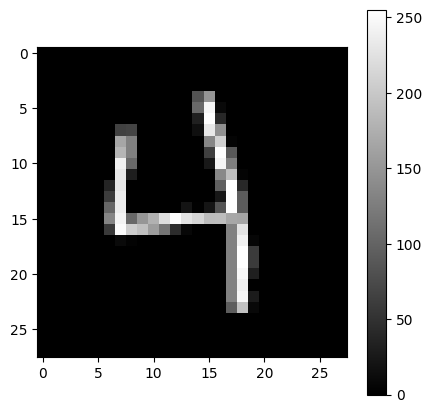

In [78]:
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

idx = 682
x = X_train[idx, :]
t = t_train[idx]
print("x:", x)
print("x (shape):", x.shape)
print("t:", t)

plt.figure(figsize=(5, 5))
plt.imshow(x, cmap="gray")
plt.colorbar()
plt.show()

In [79]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255.

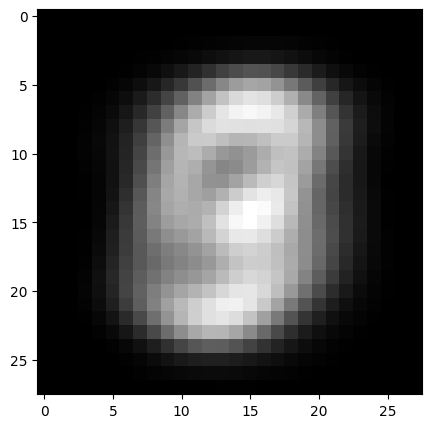

In [80]:
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean


plt.figure(figsize=(5, 5))
plt.imshow(X_mean.reshape((28, 28))*255, cmap="gray")
plt.show()

In [81]:
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

print(T_train[idx])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [82]:
tf.keras.backend.clear_session()

In [83]:
model = tf.keras.models.Sequential()

In [84]:
model.add(tf.keras.layers.Input(shape=(784,)))

In [85]:
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('sigmoid'))

In [86]:
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

In [87]:
optimizer = tf.keras.optimizers.SGD(lr=0.01)

In [88]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(784,)))

model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('sigmoid'))

model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

optimizer = tf.keras.optimizers.SGD(lr=0.01)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [89]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [90]:
history = tf.keras.callbacks.History()

model.fit(
    X_train, T_train,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[history]
)

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 2.0645 - accuracy: 0.4631 - val_loss: 1.7985 - val_accuracy: 0.6642
Epoch 2/20
422/422 [==============================] - 4s 8ms/step - loss: 1.6172 - accuracy: 0.6901 - val_loss: 1.3909 - val_accuracy: 0.7672
Epoch 3/20
422/422 [==============================] - 3s 8ms/step - loss: 1.2834 - accuracy: 0.7542 - val_loss: 1.0988 - val_accuracy: 0.8182
Epoch 4/20
422/422 [==============================] - 3s 6ms/step - loss: 1.0536 - accuracy: 0.7930 - val_loss: 0.9038 - val_accuracy: 0.8462
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.8992 - accuracy: 0.8154 - val_loss: 0.7720 - val_accuracy: 0.8615
Epoch 6/20
422/422 [==============================] - 4s 9ms/step - loss: 0.7924 - accuracy: 0.8307 - val_loss: 0.6788 - val_accuracy: 0.8725
Epoch 7/20
422/422 [==============================] - 5s 11ms/step - loss: 0.7154 - accuracy: 0.8432 - val_loss: 0.6109 - val_accuracy: 0.8797
Epoch

In [91]:
score = model.evaluate(X_test, T_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3930259644985199
Test accuracy: 0.8952999711036682


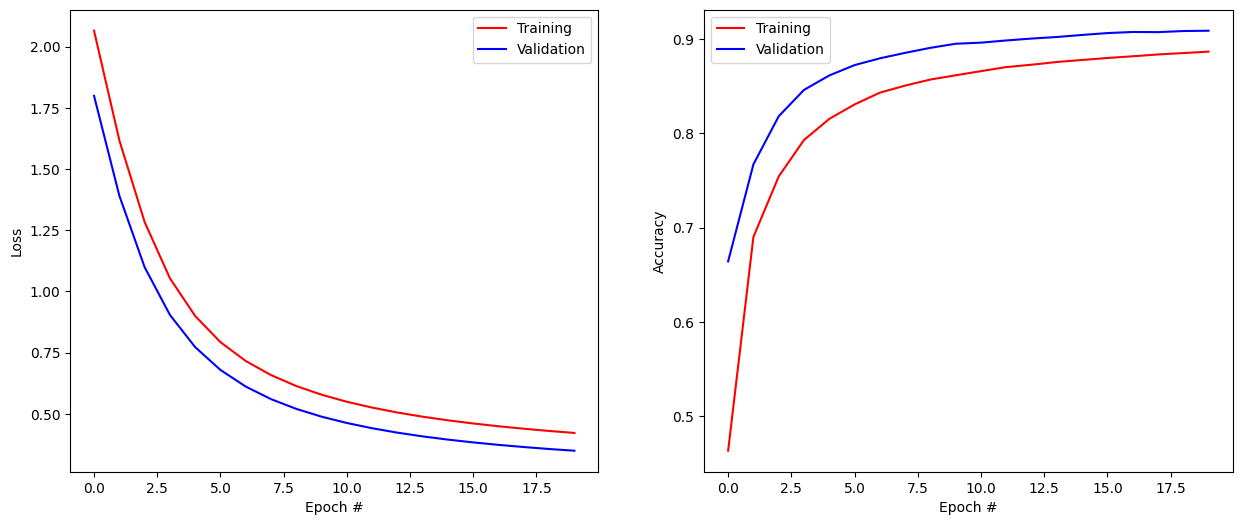

In [92]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#ANSWER 1

There is no overfitting as the validation data is in similar curve to the training data. Looking at the curves, we can still look for more epochs

313/313 [==============================] - 1s 2ms/step


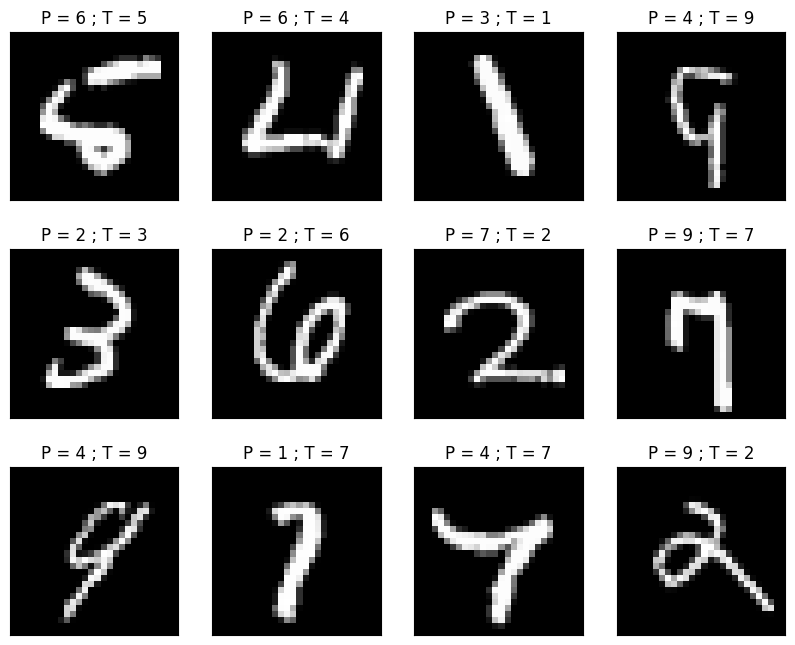

In [93]:
Y_test = model.predict(X_test)
c_test = np.argmax(Y_test, axis=-1)

misclassification = (c_test != t_test).nonzero()[0]

plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow((X_test[misclassification[i], :] + X_mean).reshape((28, 28)), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('P = ' + str(c_test[misclassification[i]]) + ' ; T = ' + str(t_test[misclassification[i]]))
    plt.xticks([]); plt.yticks([])
plt.show()

#ANSWER 2

No, Some numbers predicted are completly unrelated in stroke design with the actual value. hence it cannot be ignored.
For example, the third predicted value is 3 but the trained data value is 1 which do not have any similarities. Another predicted value is 4 but the actual value is 7.
One more example is predicted 2 but actual value is 3.






#ANSWER 3



In [156]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.0001 )))

model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('sigmoid'))

model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

history = tf.keras.callbacks.History()


model.fit(
    X_train, T_train,
    batch_size=16 ,
    epochs=20,
    validation_split=0.1,
    callbacks=[history]
)

Epoch 1/20
3375/3375 [==============================] - 15s 4ms/step - loss: 0.3080 - accuracy: 0.9099 - val_loss: 0.1314 - val_accuracy: 0.9650
Epoch 2/20
3375/3375 [==============================] - 12s 4ms/step - loss: 0.1162 - accuracy: 0.9675 - val_loss: 0.1112 - val_accuracy: 0.9695
Epoch 3/20
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0820 - accuracy: 0.9774 - val_loss: 0.0904 - val_accuracy: 0.9767
Epoch 4/20
3375/3375 [==============================] - 12s 4ms/step - loss: 0.0655 - accuracy: 0.9829 - val_loss: 0.0873 - val_accuracy: 0.9783
Epoch 5/20
3375/3375 [==============================] - 12s 4ms/step - loss: 0.0526 - accuracy: 0.9872 - val_loss: 0.0864 - val_accuracy: 0.9805
Epoch 6/20
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0435 - accuracy: 0.9897 - val_loss: 0.0869 - val_accuracy: 0.9783
Epoch 7/20
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0359 - accuracy: 0.9919 - val_loss: 0.0865 - val_ac

In [157]:
score = model.evaluate(X_test, T_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07605146616697311
Test accuracy: 0.9810000061988831
